<a href="https://colab.research.google.com/github/daniaJab/Presidential-Election-Prediction---ML/blob/main/Midterm_Numeric_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Team mates : Dania Jabri, Sai Jakkireddy, Albin Vinoy

# **Imports and data prepration**

In [ ]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import os
import pandas as pd
from google.colab import drive

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [ ]:
# Read the dataset into a dataframe
drive.mount('/content/drive')

####Working with dataset 1

mypath ="/content/drive/My Drive/ML-Summer-2023/Explorers/Data"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir(mypath)
df = pd.read_excel("EconomyMeasures - SmallSample.xlsx")

#Goal of the project:


### How do economic metrics like unemployment rates, wages, prices and new job opportunities affect presidential elections ?



>  In this project we will investigate if we can predict political outcomes based on the economy status or based on other factors that affect how people perceive the economy.




*** What is our base data set ***

Our base dataset begins with just the 2008 election results that is divided by county. We use FIPS_CODE, which is a unique code to identify each county in the united states. The main components of the data Unemployment data for 2008 to 2011 and voting results by country from 2008 and 2012.

In [ ]:
df['Voting Result by Party 2012'] = df[['dem_2012', 'gop_2012', 'oth_2012']].idxmax(axis=1)
df['Voting Result by Party 2008'] = df[['dem_2008', 'gop_2008', 'oth_2008']].idxmax(axis=1)

<Axes: xlabel='Voting Result by Party 2012', ylabel='count'>

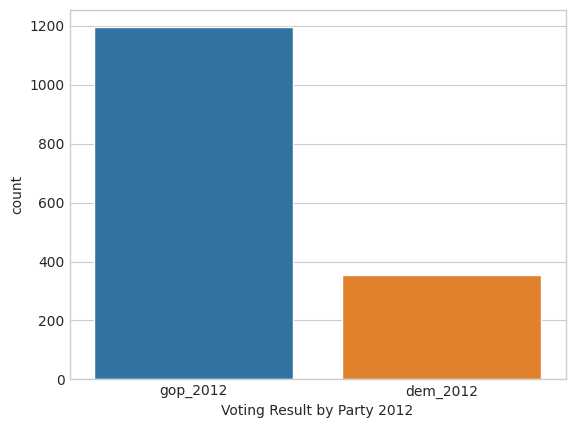

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = df['Voting Result by Party 2012'])

<Axes: xlabel='Voting Result by Party 2008', ylabel='count'>

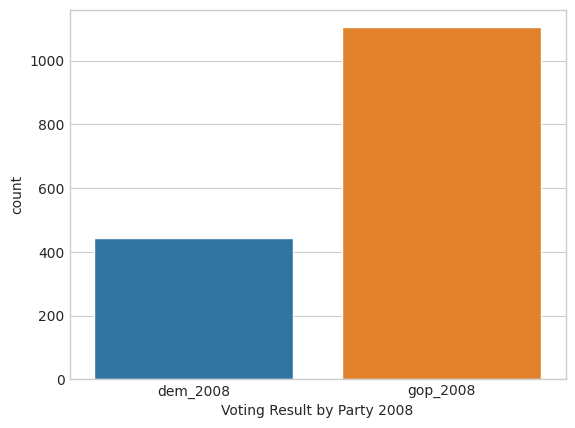

In [ ]:
sns.countplot(x = df['Voting Result by Party 2008'])

*** Visualizing our base data ***

First let us compare how many counties voted democratic vs republican in 2008 and compare that value to election results from 2012. In the two graphs above, we can clearly see the distinction where close to 1200 counties voted democratic in 2012 where as only close to 425 voted for democratic in 2008.

### Data Prepration

In [ ]:
#Preprocessing and cleaning data:
# #Data Prep
# feature transformation ;
# transform features, add new features to dataset via amalgamations (see below) , compare results with original
df.head(5)

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,...,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Voting Result by Party 2012,Voting Result by Party 2008
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,...,17104.0,15985.0,1119.0,6.5,17038.0,15940.0,1098.0,6.4,gop_2012,dem_2008
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,...,1649.0,1576.0,73.0,4.4,1633.0,1580.0,53.0,3.2,gop_2012,gop_2008
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,...,25561.0,23656.0,1905.0,7.5,25145.0,23883.0,1262.0,5.0,gop_2012,gop_2008
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,...,6023.0,5703.0,320.0,5.3,6917.0,6672.0,245.0,3.5,dem_2012,dem_2008
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,...,2428.0,2313.0,115.0,4.7,2329.0,2239.0,90.0,3.9,gop_2012,gop_2008


In [ ]:
df.shape

(1549, 66)

In [ ]:
df.columns

Index(['fips_code', 'county', 'total_2008', 'dem_2008', 'gop_2008', 'oth_2008',
       'total_2012', 'dem_2012', 'gop_2012', 'oth_2012', 'total_2016',
       'dem_2016', 'gop_2016', 'oth_2016', 'FIPStxt', 'State', 'Area_name',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', 'Civilian_labor_force_2007', 'Employed_2007',
       'Unemployed_2007', 'Unemployment_rate_2007',
       'Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008',
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009', 'Unemployment_rate_2009',
       'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010',
       'Unemployment_rate_2010', 'Civilian_labor_force_2011', 'Employed_2011',
       'Unemployed_2011', 'Unemployment_rate_2011',
       'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012',
       'Unemployment_rate_2012', 'Civilian_labor_force_2013', 'Employed_2013',
       'Unemployed_2013', 

In [ ]:
#Check Missing Values:
df.isnull().sum()

fips_code                      0
county                         0
total_2008                     0
dem_2008                       0
gop_2008                       0
                              ..
Employed_2017                  1
Unemployed_2017                1
Unemployment_rate_2017         1
Voting Result by Party 2012    0
Voting Result by Party 2008    0
Length: 66, dtype: int64

In [ ]:
#drop null
df = df.dropna()

In [ ]:
df.describe()

,fips_code,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,...,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017
count,1548.000000,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1.548000e+03,...,1548.000000,1548.000000,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1.548000e+03,1.548000e+03,1548.000000,1548.000000
mean,30484.153747,4.184527e+04,2.217915e+04,18994.575581,566.716408,3.931019e+04,1.997605e+04,18716.096253,618.049096,4.083284e+04,...,2604.579457,5.539212,5.011386e+04,4.767338e+04,2440.481912,5.231654,5.062583e+04,4.842169e+04,2204.137597,4.593540
std,15043.674233,1.055577e+05,6.954922e+04,38608.405481,1335.842444,9.740936e+04,6.246796e+04,37274.263882,1537.251577,1.024399e+05,...,7563.126753,1.985544,1.385699e+05,1.316363e+05,7146.909809,1.855457,1.402224e+05,1.339838e+05,6406.603748,1.593181
min,1003.000000,1.630000e+02,8.000000e+00,94.000000,0.000000,1.450000e+02,5.000000e+00,83.000000,0.000000,1.590000e+02,...,7.000000,1.900000,1.770000e+02,1.700000e+02,7.000000,2.000000,1.630000e+02,1.570000e+02,6.000000,1.700000
25%,18797.500000,5.067000e+03,1.902250e+03,2906.750000,72.000000,4.918750e+03,1.585000e+03,2957.250000,68.750000,4.929750e+03,...,284.000000,4.200000,4.992500e+03,4.688250e+03,270.000000,4.000000,4.979750e+03,4.705750e+03,231.750000,3.500000
50%,29182.000000,1.136300e+04,4.560500e+03,6439.000000,174.000000,1.104800e+04,3.991000e+03,6539.500000,170.500000,1.125550e+04,...,682.500000,5.300000,1.191850e+04,1.126350e+04,640.500000,4.900000,1.204450e+04,1.144500e+04,551.000000,4.400000
75%,45071.500000,3.065100e+04,1.317650e+04,16929.250000,460.000000,2.864925e+04,1.184600e+04,16506.750000,468.000000,3.020450e+04,...,1809.750000,6.600000,3.348400e+04,3.193675e+04,1705.000000,6.100000,3.407350e+04,3.234700e+04,1516.750000,5.300000
max,56045.000000,2.137466e+06,1.629024e+06,487736.000000,20706.000000,1.944401e+06,1.439123e+06,479204.000000,26074.000000,2.055215e+06,...,164367.000000,24.100000,2.669585e+06,2.507250e+06,162335.000000,23.600000,2.653153e+06,2.514113e+06,139040.000000,19.100000


In [ ]:
# Drop some columns which is not relevant to the analysis (they are not numeric) data we want [2008-2011]
#Axis (Default 0) Axis = 0 or 'index' tells Pandas you want to remove rows.
# Lastly, axis = 1 or 'columns tells Pandas you want to remove columns
#cols_to_drop = ['Name', 'Ticket', 'Cabin']
# Drop some columns which is not relevant to the analysis (they are not numeric) data we want [2008-2011]
cols_to_drop = ['total_2008', 'dem_2008', 'gop_2008', 'oth_2008', 'total_2016','dem_2016', 'gop_2016', 'oth_2016', 'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'Metro_2013', 'Civilian_labor_force_2007', 'Employed_2007',
       'Unemployed_2007', 'Unemployment_rate_2007', 'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012',
       'Unemployment_rate_2012', 'Civilian_labor_force_2013', 'Employed_2013',
       'Unemployed_2013', 'Unemployment_rate_2013',
       'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014',
       'Unemployment_rate_2014', 'Civilian_labor_force_2015', 'Employed_2015',
       'Unemployed_2015', 'Unemployment_rate_2015',
       'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016',
       'Unemployment_rate_2016', 'Civilian_labor_force_2017', 'Employed_2017',
       'Unemployed_2017', 'Unemployment_rate_2017' , 'county', 'Area_name']


In [ ]:
df = df.drop(cols_to_drop , axis = 1)
df.head(5)

,fips_code,total_2012,dem_2012,gop_2012,oth_2012,FIPStxt,State,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Voting Result by Party 2012,Voting Result by Party 2008
0,26041,18043,8330,9533,180,26041.0,MI,19692.0,18067.0,1625.0,...,18177.0,15898.0,2279.0,12.5,17814.0,15897.0,1917.0,10.8,gop_2012,dem_2008
1,48295,1168,119,1044,5,48295.0,TX,1806.0,1755.0,51.0,...,1665.0,1567.0,98.0,5.9,1743.0,1663.0,80.0,4.6,gop_2012,gop_2008
2,1127,28497,6551,21633,313,1127.0,AL,28758.0,27113.0,1645.0,...,27279.0,23815.0,3464.0,12.7,27092.0,24034.0,3058.0,11.3,gop_2012,gop_2008
3,48389,2867,1649,1185,33,48389.0,TX,4177.0,3938.0,239.0,...,5748.0,5239.0,509.0,8.9,5543.0,5098.0,445.0,8.0,dem_2012,dem_2008
4,56017,2495,523,1894,78,56017.0,WY,2413.0,2334.0,79.0,...,2569.0,2435.0,134.0,5.2,2600.0,2468.0,132.0,5.1,gop_2012,gop_2008


Text(0.5, 1.0, 'pearson correlation')

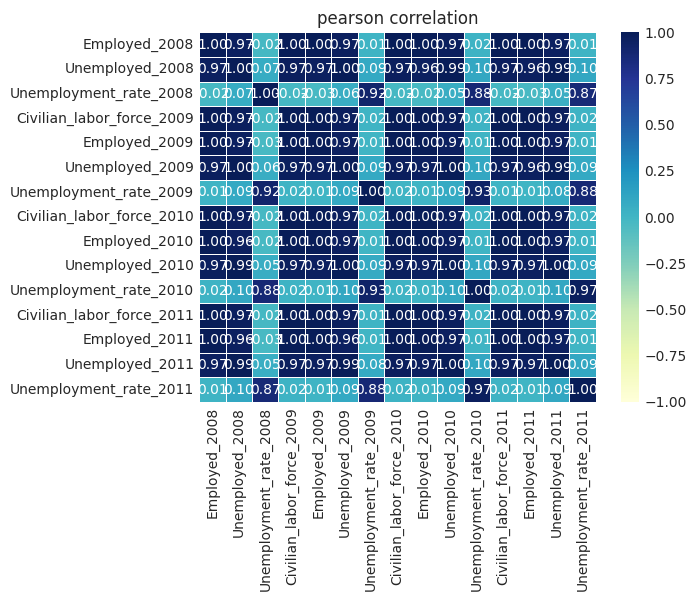

In [ ]:
import matplotlib.pyplot as plt
#first selecting features related to un/employment by looking at correlation
corr_matrix = df[[ 'Employed_2008',
       'Unemployed_2008', 'Unemployment_rate_2008',
       'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009',
       'Unemployment_rate_2009', 'Civilian_labor_force_2010', 'Employed_2010',
       'Unemployed_2010', 'Unemployment_rate_2010',
       'Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011',
       'Unemployment_rate_2011' ] ]
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sb.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
#looking at the correlation matrix, employment, unemployment, and labor force are highly correlated. Unemployment rate is the best feature to keep

newFeaturesSet = df[[ 'Unemployment_rate_2008',  'Unemployment_rate_2009' ,  'Unemployment_rate_2010' ,  'Unemployment_rate_2011']]

Text(0.5, 1.0, 'pearson correlation')

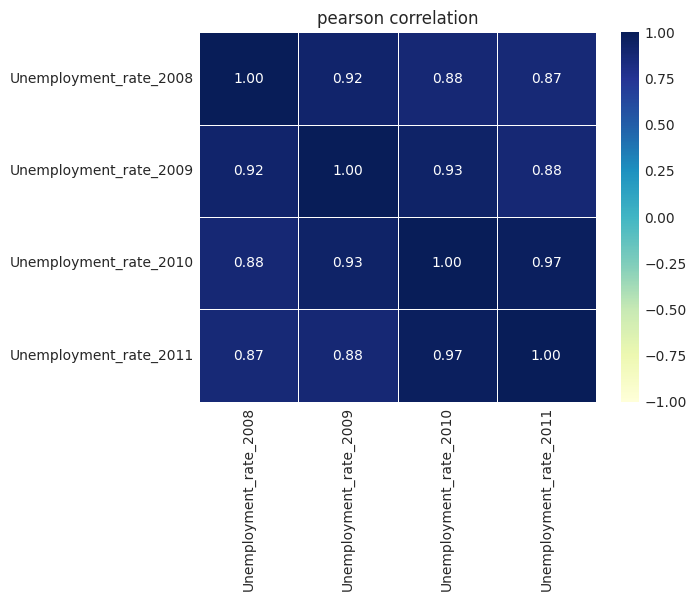

In [ ]:
#double checking for correlation in new dataset

corr_matrix = newFeaturesSet
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sb.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [ ]:
#unemployment rate for all the years are correlated so we can take the average in those years and create a new column then drop all unecassary features related to employment
#Transformation

df['avaUnempRate'] = df[['Unemployment_rate_2008',  'Unemployment_rate_2009' ,  'Unemployment_rate_2010' ,  'Unemployment_rate_2011']].mean(axis=1)


df = df.drop( ['Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008',
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009', 'Unemployment_rate_2009',
       'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010',
       'Unemployment_rate_2010', 'Civilian_labor_force_2011', 'Employed_2011',
       'Unemployed_2011', 'Unemployment_rate_2011'], axis=1)

In [ ]:
df.head(5)

,fips_code,total_2012,dem_2012,gop_2012,oth_2012,FIPStxt,State,Voting Result by Party 2012,Voting Result by Party 2008,avaUnempRate
0,26041,18043,8330,9533,180,26041.0,MI,gop_2012,dem_2008,10.975
1,48295,1168,119,1044,5,48295.0,TX,gop_2012,gop_2008,5.025
2,1127,28497,6551,21633,313,1127.0,AL,gop_2012,gop_2008,10.325
3,48389,2867,1649,1185,33,48389.0,TX,dem_2012,dem_2008,8.500
4,56017,2495,523,1894,78,56017.0,WY,gop_2012,gop_2008,4.875


In [ ]:
# adding new column
df['Voting_Results'] = df[['dem_2012', 'gop_2012', 'oth_2012']].idxmax(axis=1)

In [ ]:
#creating a numeric values instead of paty id 'dem_2012', 'gop_2012', 'oth_2012' 0 , 1 , 2
df['Voting_Result_num'] = ''

In [ ]:
#df.loc[[0,1]] # print first two rows

for i, row in df.iterrows():
  if df.at[i, 'Voting_Results'] == 'dem_2012':
     df.at[i, 'Voting_Result_num'] = 0

  elif df.at[i , 'Voting_Results'] == 'gop_2012':
    df.at[i , 'Voting_Result_num'] = 1


#df.head(30)


#**Experiment** 1 :
## Regression on the first dataset:
We will start with simple linear regression to see if avarage unemployment rate is a feature that actually affect political outcomes by itself.
We will see if it is enough to create a linear model to predict voteing results.

In [ ]:
df.columns

Index(['fips_code', 'total_2012', 'dem_2012', 'gop_2012', 'oth_2012',
       'FIPStxt', 'State', 'Voting Result by Party 2012',
       'Voting Result by Party 2008', 'avaUnempRate', 'Voting_Results',
       'Voting_Result_num'],
      dtype='object')

In [ ]:
#now creating model to predict voting outcomes based on features before adding latent variables

df1 = df[['dem_2012', 'avaUnempRate']].copy()
df1 = df1.dropna()

In [ ]:
# appling regression on only one feature
X = df1[['avaUnempRate']]
y = df1["dem_2012"]

In [ ]:
#Split the Dataset into Training and Test Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X , y , test_size = 0.3 , random_state = 0 )

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg

LinearRegression()

In [ ]:
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
pred=reg.predict(X_train)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_train, pred)

0.0012333068597344399

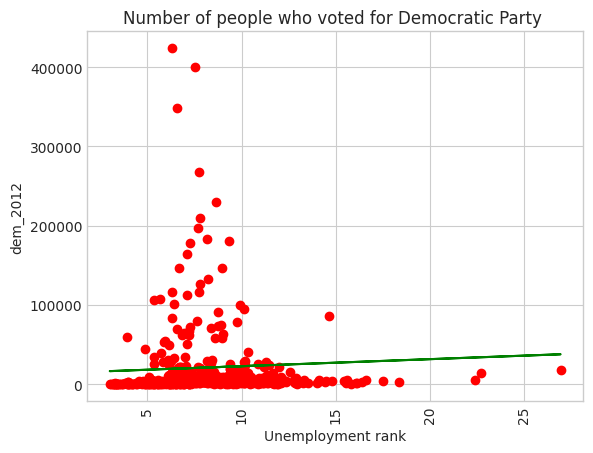

In [ ]:
#we see that our model did bad predicting votes number for democrat on only one feature, adding latent variables now
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, reg.predict(X_test), color = "green")
plt.title("Number of people who voted for Democratic Party ")
plt.xlabel("Unemployment rank")
plt.ylabel("dem_2012")
plt.xticks(rotation=90)
plt.show()

#**Conclusion** 1:

We see that our regression model did bad predicting votes number for democrat on only one feature, average unemployment rate. Therefore, adding more variables and check for improvements.

## **Experminent 2 , second datasets.**
###Trying Regression on two more features and double amount of data.
###We found data related to avarage housing prices and education per counties.

**Loading and visualising the new data**

In [ ]:

mypath ="/content/drive/My Drive/ML-Summer-2023/Explorers/Data"
os.chdir(mypath)
df2 = pd.read_excel("Output - Clean.xlsx")

In [ ]:
df2.head(5)

,fips_code,county,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,total_2012,dem_2012,gop_2012,oth_2012,FIPStxt,...,Asian Alone,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,Native Hawaiian or Other Pacific Islander Alone,Remainder of Two or More Race Responses,White Alone,Total,Total_remove_non_hispanic
0,20083,Hodgeman County,535.0,15594.05,23.1,1050,178,857,15,20083,...,0,4,4,4,190,0,0,1745,1950,1951
1,20199,Wallace County,542.0,16258.70,23.0,781,68,702,11,20199,...,4,0,4,0,95,0,0,1405,1510,1518
2,20153,Rawlins County,548.0,16953.91,21.0,1420,184,1207,29,20153,...,0,0,4,4,85,0,10,2430,2555,2547
3,20025,Clark County,563.0,17047.64,23.6,1000,171,791,38,20025,...,10,0,4,10,155,4,0,1980,2200,2193
4,20185,Stafford County,513.0,21592.56,20.8,1833,403,1382,48,20185,...,10,10,25,10,530,0,0,3760,4400,4395


Transforming features

In [ ]:
df2['avaUnempRate'] = df2[['Unemployment_rate_2008',  'Unemployment_rate_2009' ,  'Unemployment_rate_2010' ,  'Unemployment_rate_2011']].mean(axis=1)

cols_to_drop = ['total_2012' , 'FIPStxt' , 'Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008' , 'Civilian_labor_force_2009', 'Employed_2009',
       'Unemployed_2009',  'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010',
        'Civilian_labor_force_2011', 'Employed_2011',
       'Unemployed_2011', 'Unemployment_rate_average' ,  'Total' , 'Unemployment_rate_2008',  'Unemployment_rate_2009' ,  'Unemployment_rate_2010' ,  'Unemployment_rate_2011']
df2 = df2.drop(cols_to_drop , axis = 1)


In [ ]:
df2.columns

Index(['fips_code', 'county', 'Annual_Average_Weekly Wage_2012',
       'house_avg_21', 'adults_bachelors_or_higher_08-12', 'dem_2012',
       'gop_2012', 'oth_2012', 'State', 'Area_name', 'Voting_Results',
       'Voting_Result_num', 'Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone',
       'Asian and White', 'African American Alone',
       'Black or African American and White', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses', 'White Alone',
       'Total_remove_non_hispanic', 'avaUnempRate'],
      dtype='object')

In [ ]:
#Removing features related to race to have them as our latent variables to experience with later
df3 = df2.drop(['Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone',
       'Asian and White', 'African American Alone',
       'Black or African American and White', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses', 'White Alone',
       'Total_remove_non_hispanic']  , axis = 1)

In [ ]:
df3.columns

Index(['fips_code', 'county', 'Annual_Average_Weekly Wage_2012',
       'house_avg_21', 'adults_bachelors_or_higher_08-12', 'dem_2012',
       'gop_2012', 'oth_2012', 'State', 'Area_name', 'Voting_Results',
       'Voting_Result_num', 'avaUnempRate'],
      dtype='object')

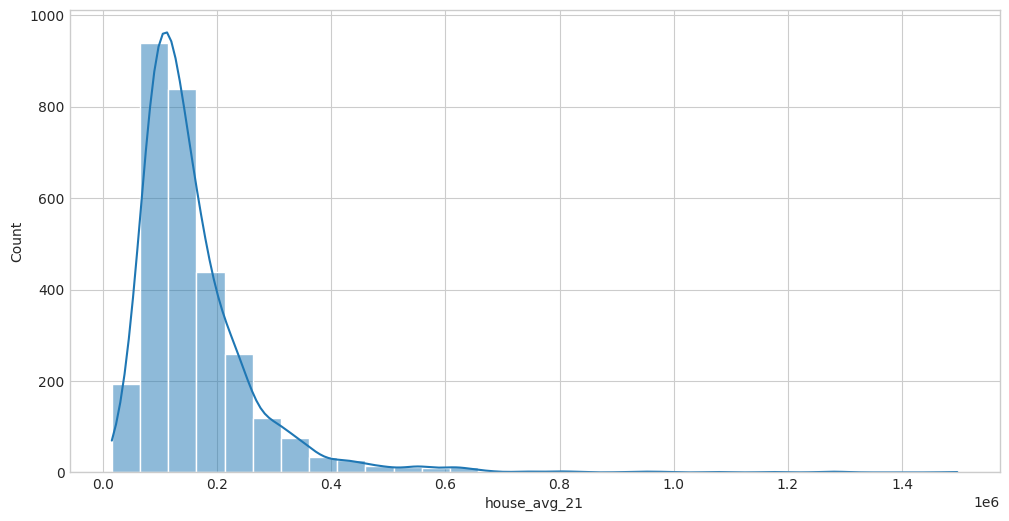

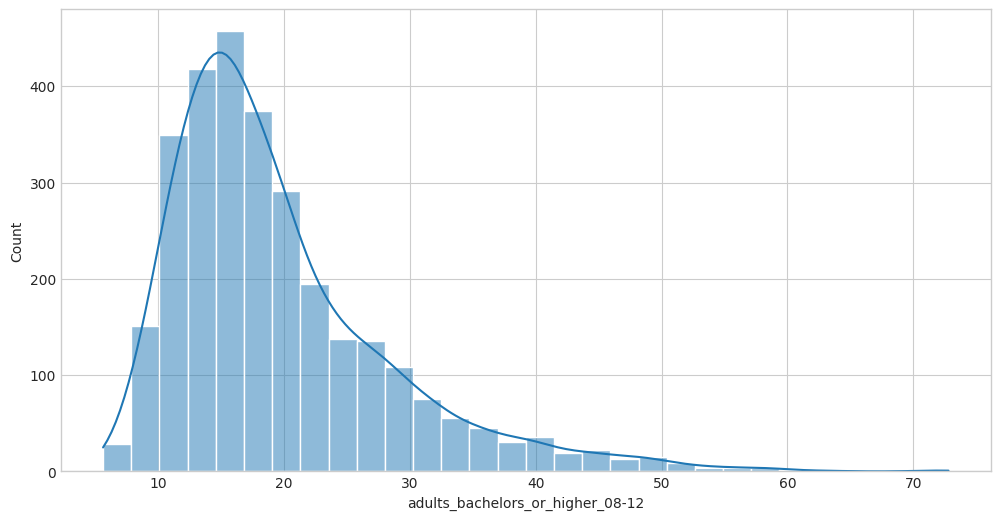

In [ ]:
#visualise distiribution of data with the new features

features = ['house_avg_21',
       'adults_bachelors_or_higher_08-12']
for i in features:
    plt.figure(figsize=(12,6));
    sb.histplot(df3[i], bins= 30 , kde=True);

In [ ]:
# appling regression on the new features
df3 = df3.dropna()
X1 = df3[['adults_bachelors_or_higher_08-12','avaUnempRate' , 'house_avg_21']]
y1 = df3["dem_2012"]

#Split the Dataset into Training and Test Datasets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1= train_test_split(X1 , y1 , test_size = 0.3 , random_state = 0 )

reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)
pred1 =reg1.predict(X_train1)

metrics.r2_score(y_train1, pred1)

0.11423132167832317

## **Conclusion 2:**
Adding these two features didn't show good results but improved from only one feature

### **Experiment 3:** , Third Dataset
Adding races information for voters as studies show that it affects voting behaviours. ( #, article attached in paper) so we believe this could be latent variables.

We searched for data with more feature but out of multiple datasets (attached in the project paper ) only one related to race was helpful due to year and categorizations. we are studing data from 2008- 2016 and data are related to counties.

Loading new datasets and training on regression model

In [ ]:
# appling regression on the new features
df2 = df2.dropna()
X2 = df2[['adults_bachelors_or_higher_08-12','avaUnempRate' , 'house_avg_21' , 'Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone',
       'Asian and White', 'African American Alone',
       'Black or African American and White', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses', 'White Alone',
       'Total_remove_non_hispanic']]
y2 = df2["dem_2012"]

#Split the Dataset into Training and Test Datasets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2= train_test_split(X2 , y2 , test_size = 0.3 , random_state = 0 )

reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)
pred2 =reg2.predict(X_train2)
#scores for training data
metrics.r2_score(y_train2, pred2)

0.9778197891326018

In [ ]:
#scores for testing data
pred2 =reg2.predict(X_test2)
metrics.r2_score(y_test2, pred2)

0.9069374066386082

# Conclusion 3:
Adding the race feature we see much improvements on the training data as well as on testing data

##Generating shap value and gini score to confirm our results, that race feature is the most important feature in our dataset

In [ ]:
# Install required libraries
!pip install scikit-learn
!pip install shap


R-squared score (Train): 0.9778197891326018
R-squared score (Test): 0.9069374066386082
Gini score (Train): 0.6678631949066488
Gini score (Test): 0.6558626540639219


Permutation explainer: 466it [01:01,  5.90it/s]                         


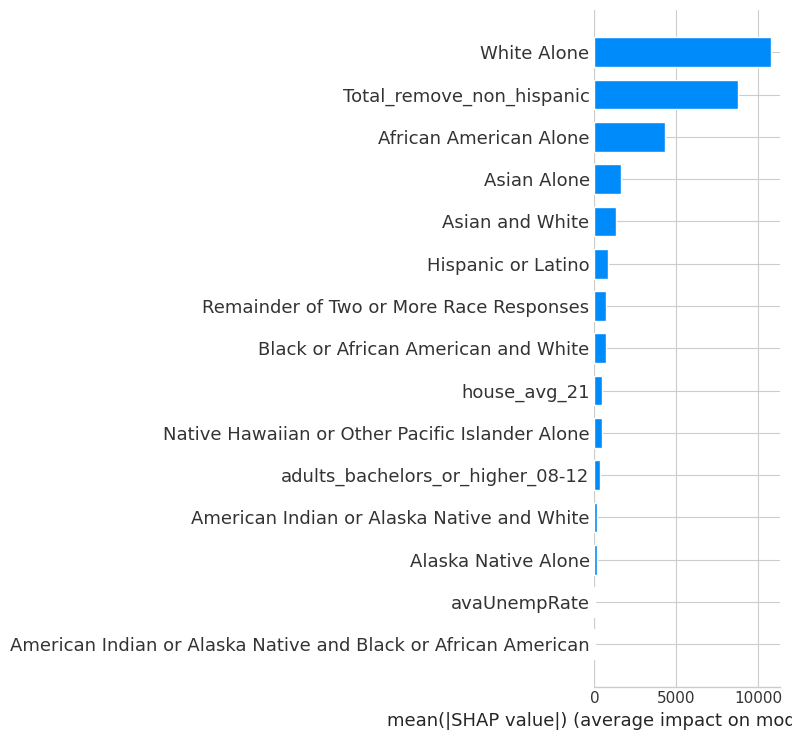

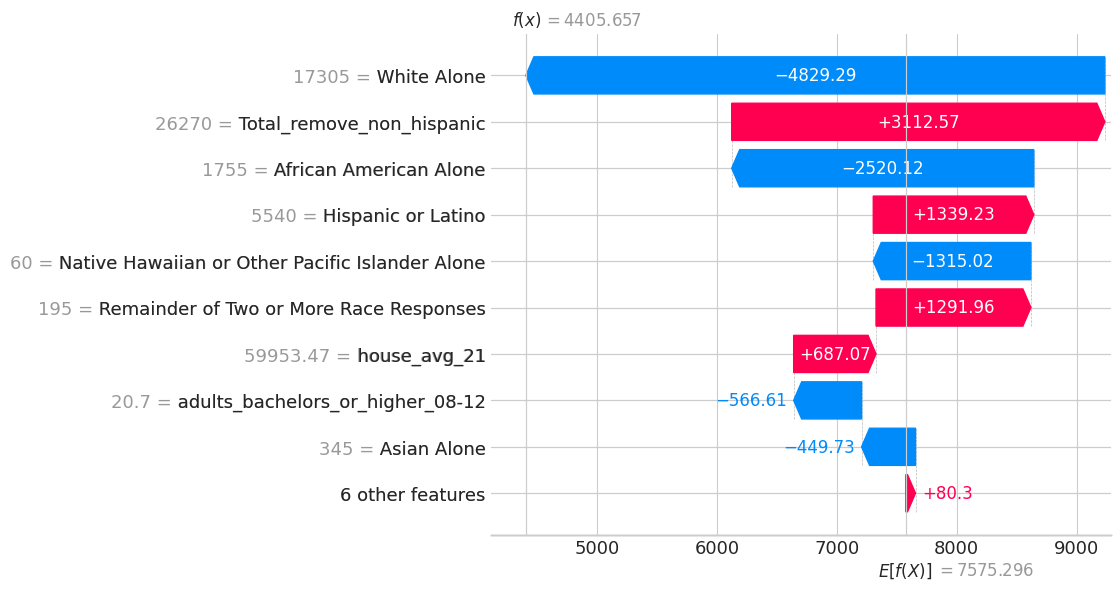

In [ ]:
import shap
shap.initjs()

# Calculate Gini score
def gini_score(y_true, y_pred):
    n = len(y_true)
    y_true_sorted = [y for _, y in sorted(zip(y_pred, y_true))]
    y_true_cumulative = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    gini = 1 - (2 * np.sum(y_true_cumulative) / n) - (1 / n)
    return gini

pred_train = reg2.predict(X_train2)
pred_test = reg2.predict(X_test2)

# Calculate R-squared score for train and test data
r2_train = metrics.r2_score(y_train2, pred_train)
r2_test = metrics.r2_score(y_test2, pred_test)

# Calculate Gini score for train and test data
gini_train = gini_score(y_train2, pred_train)
gini_test = gini_score(y_test2, pred_test)

print(f"R-squared score (Train): {r2_train}")
print(f"R-squared score (Test): {r2_test}")
print(f"Gini score (Train): {gini_train}")
print(f"Gini score (Test): {gini_test}")

# Calculate SHAP values
explainer = shap.Explainer(reg2.predict, X_train2)
shap_values = explainer(X_test2)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test2, plot_type="bar")
plt.show()
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


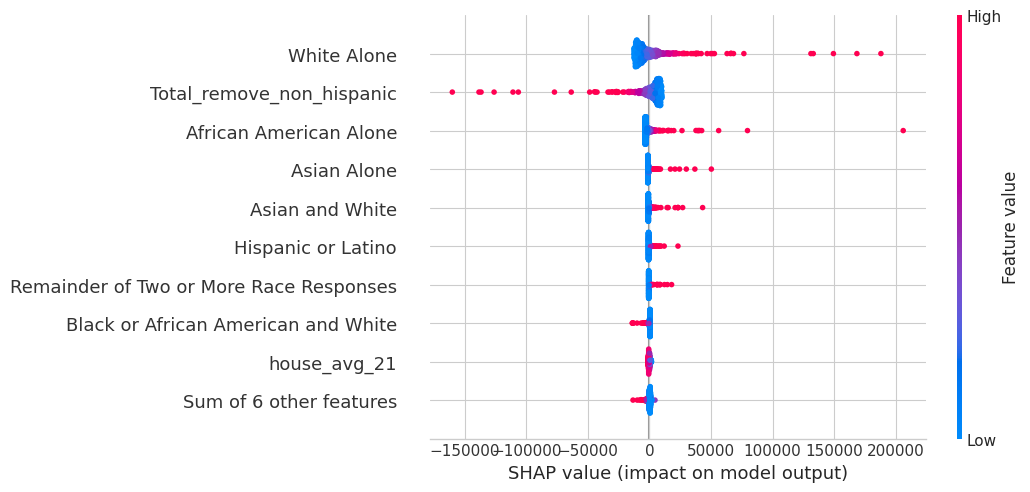

In [ ]:
shap.plots.beeswarm(shap_values)

**Conclusion on Shap:**
SHAP values provide an intuitive way to understand how each feature affects the model's predictions. Positive SHAP values indicate that the feature positively contributes to the prediction, while negative SHAP values suggest a negative impact.
From the above SHAP values and Plots, we can conclude that race features are the most important feature in our dataset.

The Gini Score is a statistical measure used to assess the inequality in a distribution. The Gini Score ranges from 0 to 1, where:0 represents perfect equality and 1 represents perfect inequality. A Gini Score closer to 0 indicates a more equal distribution, while a Gini Score closer to 1 suggests a more unequal distribution.

For our model,
Gini score (Train): 0.6678631949066488
Gini score (Test): 0.6558626540639219


#Summary for what has been done already:

We tried to create linear regression model to predict voting results by economic measures and voters races.

1.   Data Set 1 : 0.0012333068597344399 ( on training )
2.   Data Set 2 :0.1695263119351922  ( on training)
3.   Data Set 3 : 0.964406823919431 ( on training )
4.   Data Set 4 : 0.9307631630596859 ( on testing )

Now we want to try other ML models and see outcomes. We will see if we can find the best classification model and the best regression models.




#Experiment 4 , Exploring Other Regression and Classification Models:


##MULLER LOOP for Regression models:

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

names = ["Nearest Neighbors", "Linear Regression", "Random Forest",
         "MLP Regressor", "AdaBoost Regressor", "KNN Regressor", "XGBoost Regressor"]

regressors = [
    KNeighborsRegressor(n_neighbors=2),
    LinearRegression(),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    XGBRegressor()
]


X2 = StandardScaler().fit_transform(X2)
X_train, X_test, y_train, y_test = \
    train_test_split(X2, y2, test_size=.2)

# TODO (Apply): All cross-validation

max_score = -np.inf
max_regressor = None

# Iterate over regressors
for name, reg in zip(names, regressors):
    start_time = time.time()
    reg.fit(X_train, y_train)
    score = 100.0 * reg.score(X_test, y_test)
    print('Regressor = %s, Score (test, R^2) = %.2f, Training time = %.2f seconds' % (name, score, time.time() - start_time))

    if score > max_score:
        max_regressor = reg
        max_score = score

print(80 * '-')
print('Best --> Regressor = %s, Score (test, R^2) = %.2f' % (names[regressors.index(max_regressor)], max_score))


Regressor = Nearest Neighbors, Score (test, R^2) = 82.01, Training time = 0.02 seconds
Regressor = Linear Regression, Score (test, R^2) = 93.78, Training time = 0.00 seconds
Regressor = Random Forest, Score (test, R^2) = 83.38, Training time = 0.03 seconds


Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


Regressor = MLP Regressor, Score (test, R^2) = 76.38, Training time = 18.13 seconds
Regressor = AdaBoost Regressor, Score (test, R^2) = 88.02, Training time = 0.30 seconds
Regressor = KNN Regressor, Score (test, R^2) = 83.46, Training time = 0.02 seconds
Regressor = XGBoost Regressor, Score (test, R^2) = 80.52, Training time = 0.64 seconds
--------------------------------------------------------------------------------
Best --> Regressor = Linear Regression, Score (test, R^2) = 93.78


##Best --> Regressor = Linear Regression

## ROC curves

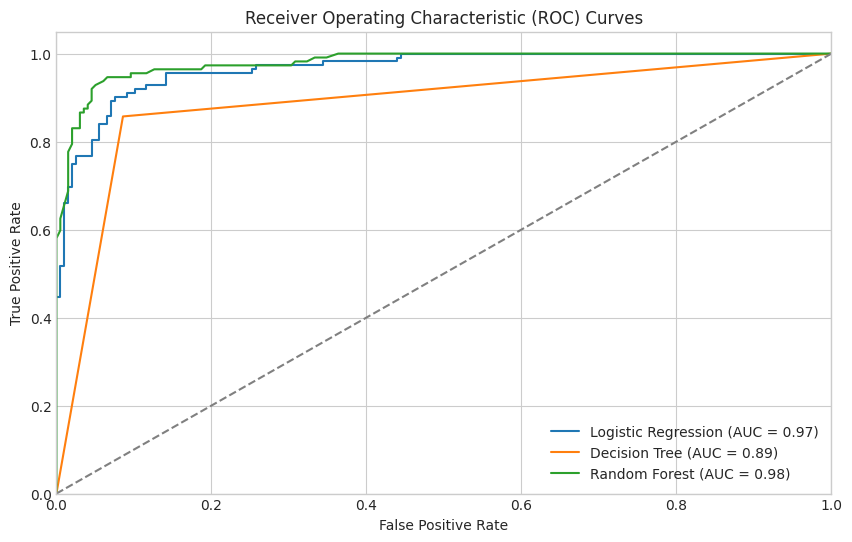

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time
import matplotlib.pyplot as plt

# Convert the regression target to binary classification
y2_binary = np.where(y2 >= np.median(y), 1, 0)

X2 = StandardScaler().fit_transform(X2)
X_train, X_test, y_train, y_test = train_test_split(X2, y2_binary, test_size=.2)

# Classifiers
names = ["Logistic Regression", "Decision Tree", "Random Forest"]
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

# Lists to store FPR, TPR, and AUC values for each model
fpr_list = []
tpr_list = []
roc_auc_list = []

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Use predicted probabilities of the positive class

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(names)):
    plt.plot(fpr_list[i], tpr_list[i], label='%s (AUC = %.2f)' % (names[i], roc_auc_list[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


The AUC (Area Under the ROC Curve) is a scalar value that summarizes the overall performance of a binary classification model based on its ROC curve. In general, a higher AUC indicates a better classifier.

###Muller Loop for Classification Models

In [ ]:
df2.columns #using the third dataset that have the most features


Index(['fips_code', 'county', 'Annual_Average_Weekly Wage_2012',
       'house_avg_21', 'adults_bachelors_or_higher_08-12', 'dem_2012',
       'gop_2012', 'oth_2012', 'State', 'Area_name', 'Voting_Results',
       'Voting_Result_num', 'Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone',
       'Asian and White', 'African American Alone',
       'Black or African American and White', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses', 'White Alone',
       'Total_remove_non_hispanic', 'avaUnempRate'],
      dtype='object')

In [ ]:
df2.columns.get_loc('Voting_Results')

10

In [ ]:
df4 = df2.drop(['county' , 'State' , 'Area_name' , 'Voting_Results' ] , axis = 1)
X4 = df4.values #colums
y4 = df2['Voting_Results'].values


In [ ]:
#Split the Dataset into Training and Test Datasets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X4 , y4 , test_size = 0.3 , random_state = 0 )

In [ ]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#x, y = X_data_reshape, y_data

X4 = StandardScaler().fit_transform(X4)
X_train, X_test, y_train, y_test = \
    train_test_split(X4, y4, test_size=.2)

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.68, Training time = 0.03 seconds
Classifier = Linear SVM, Score (test, accuracy) = 100.00, Training time = 0.12 seconds
Classifier = RBF SVM, Score (test, accuracy) = 87.10, Training time = 0.56 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Random Forest, Score (test, accuracy) = 92.90, Training time = 0.09 seconds
Classifier = Neural Net, Score (test, accuracy) = 100.00, Training time = 4.13 seconds
Classifier = AdaBoost, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = QDA, Score (test, accuracy) = 100.00, Training time = 0.02 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


Variables are collinear


##Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00
Variables are collinear

# Experiment 5 , Fractal Clustering :

K-means clustering model

In [ ]:
#We already processed data and cleand them and now we have dataset with the following features:

df2.columns



Index(['fips_code', 'county', 'Annual_Average_Weekly Wage_2012',
       'house_avg_21', 'adults_bachelors_or_higher_08-12', 'dem_2012',
       'gop_2012', 'oth_2012', 'State', 'Area_name', 'Voting_Results',
       'Voting_Result_num', 'Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone',
       'Asian and White', 'African American Alone',
       'Black or African American and White', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses', 'White Alone',
       'Total_remove_non_hispanic', 'avaUnempRate'],
      dtype='object')

In [ ]:
#creating new df for clustering with features , without labels.
clus_df = df2.drop([ 'county', 'gop_2012', 'oth_2012',
       'State', 'Area_name', 'Voting_Results',
       'Alaska Native Alone',
       'American Indian or Alaska Native and Black or African American',
       'American Indian or Alaska Native and White', 'Asian Alone' , 'Native Hawaiian or Other Pacific Islander Alone',
       'Remainder of Two or More Race Responses' , 'Total_remove_non_hispanic'], axis = 1)
clus_df.head(5)

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775


In [ ]:
#filtering to have the results for counties who voted for democratic party only
clus_df = clus_df[clus_df['Voting_Result_num'] == 1.0]
clus_df

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,48161,801.0,134669.98,12.9,1848,1,20,3190,45,2705,13470,6.575
1544,22007,805.0,134921.55,9.0,4754,1,0,7145,50,485,15405,9.375
1545,32011,1615.0,134941.01,24.9,107,1,0,10,0,120,1600,6.625
1546,29213,516.0,135096.23,19.0,5462,1,250,90,35,2480,47015,11.700


# **Finding the Golden Cluster:**

Goal : we will experiment with clustering by finding the cluster that has counties with the smallest unemployment rate and the smallest housing price who voted for democratic party.

We will find K, for K-means through:
1. Sum of squares of error (SSE) within cluster.
2. Silhouette score.
We would want to have a low SSE value and high silhouette score (silhouette score ranges from 1 to -1).

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:] #everything except for fips

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


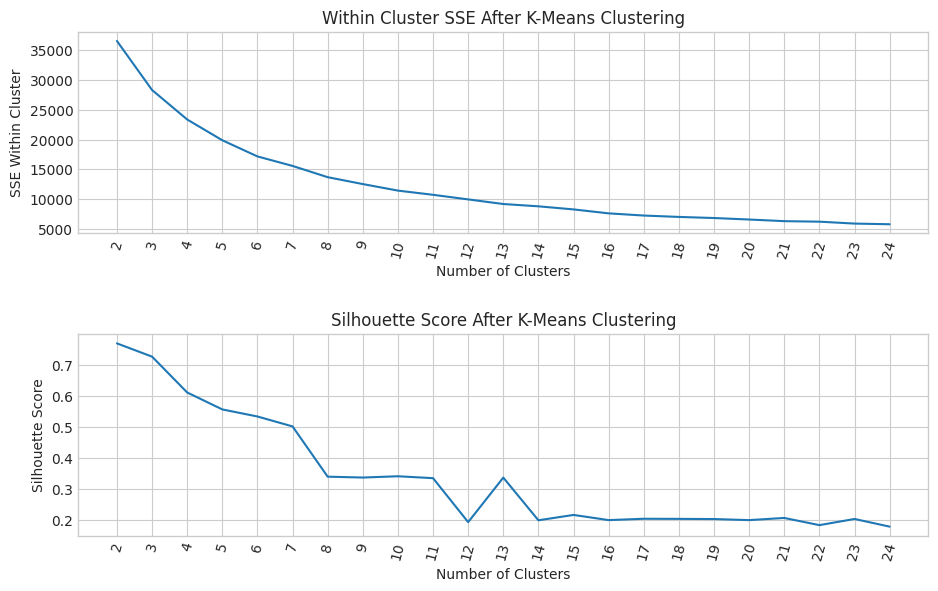

In [ ]:
plot_cluster(clus_df, max_loop=25)

By Plotting only SSE and Silhouette Score, we see that K = 7 would be a good cluster number in the first trail. But adding fractal distances and doing Fractal Clustering

To use Fractal Clustering, We are using cdist Function. cdist Function is a function from the scipy.spatial.distance module that calculates pairwise distances between observations in two sets of points. It stands for "Compute distance between each pair of the two collections of inputs." The cdist function takes two arrays of points as input and returns a matrix of distances where each element represents the distance between a pair of points from the two arrays. The function allows us to specify the distance metric we want to use for calculating the distances.

In [ ]:
from scipy.spatial.distance import cdist

def fractal_distance(X, centers):
    """
    Calculates the Fractal Distance between data points and cluster centers.
    """
    distances = cdist(X, centers)
    min_distances = np.min(distances, axis=1)
    return min_distances

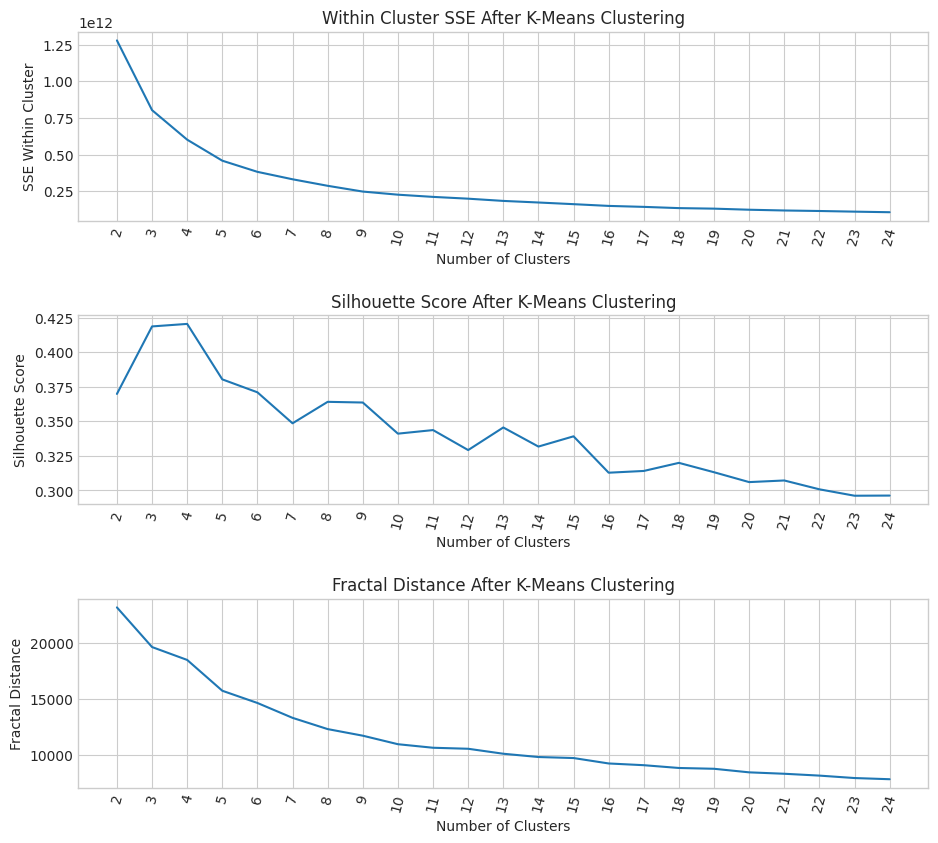

In [ ]:
def plot_cluster_with_fractal(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:] #everything except for fips

    fractal_scores = []
    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X)

        # Calculate Fractal Distance
        distances = fractal_distance(X, kmeans.cluster_centers_)
        fractal_scores.append(np.mean(distances))

        # Calculate SSE Within Cluster
        sse_within_cluster[k] = kmeans.inertia_

        # Calculate Silhouette Score
        silhouette_score[k] = metrics.silhouette_score(X, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10, 9))
    ax1 = plt.subplot(311)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(312)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax3 = plt.subplot(313)
    _ = plt.plot(range(2, max_loop), fractal_scores)
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Fractal Distance")
    _ = plt.title("Fractal Distance After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

plot_cluster_with_fractal(clus_df, max_loop=25)

By Plotting SSE and Silhouette Score and Fractal Distances, we see that K = 6 would be a good cluster number in the first trail.

In [ ]:
def apply_cluster(df, clusters=6):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse withing cluster: " + str(sse_within_cluster))

    return df

In [ ]:
first_trial = apply_cluster(clus_df, 6)

clustering performance
-----------------------------------
silhouette score: 0.5349287042762195
sse withing cluster: 17173.78460226668


In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"house_avg_21":"mean", "avaUnempRate":"mean" , "fips_code":"count"})
    .sort_values('avaUnempRate')
    .reset_index()
)

cluster_perf_df
# # "Black or African American and White":"count",
#        "African American Alone":"count",
#        "Hispanic or Latino" : "count", "White Alone": "count"

,cluster,house_avg_21,avaUnempRate,fips_code
0,2,113134.029032,7.236290,31
1,3,132704.540000,7.425000,1
2,1,118646.660556,7.926389,18
3,0,92716.192703,8.339806,1106
4,4,107651.223986,9.348370,138
5,5,118485.840000,9.775000,1


In these 6 Clusters, we are choosing Cluster Number 0 to Cluster Further which has 1106 Counties with decent average unemployment rate and the smallest housing price  average who voted for democratic party

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate,cluster
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725,0
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525,0
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600,0
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775,0
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775,0


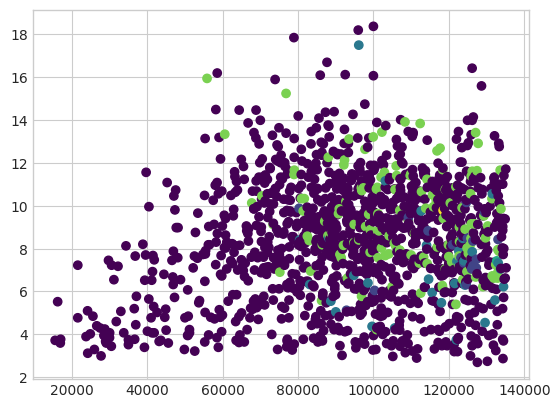

In [ ]:
labels = clus_df['cluster'].values
plt.scatter(clus_df['house_avg_21'], clus_df['avaUnempRate'], c=labels, cmap='viridis')
clus_df.head(5)

In [ ]:
# creating a dataframe that only consists of cluster `0'
new_data_sub = clus_df.query("cluster == 0").reset_index(drop=True)
new_data_sub

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate,cluster
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725,0
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525,0
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600,0
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775,0
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,48161,801.0,134669.98,12.9,1848,1,20,3190,45,2705,13470,6.575,0
1102,22007,805.0,134921.55,9.0,4754,1,0,7145,50,485,15405,9.375,0
1103,32011,1615.0,134941.01,24.9,107,1,0,10,0,120,1600,6.625,0
1104,29213,516.0,135096.23,19.0,5462,1,250,90,35,2480,47015,11.700,0


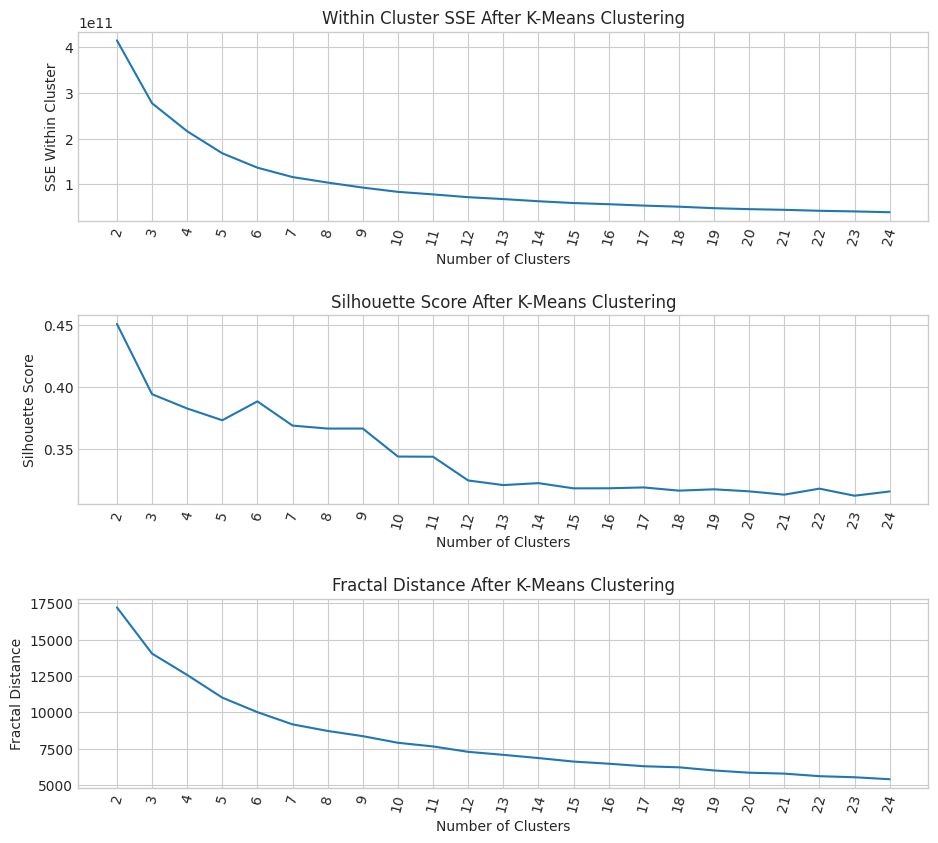

In [ ]:
plot_cluster_with_fractal(new_data_sub, max_loop=25)

For second trial, Plotting SSE and Silhouette Score and Fractal Distances, we see that K = 3 would be a good cluster number to go with.

In [ ]:
#k = 3 for cluster 0 seems to be the best
second_trial = apply_cluster(new_data_sub, 3)

clustering performance
-----------------------------------
silhouette score: 0.3737283219340206
sse withing cluster: 8501.242465499616


In [ ]:
cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"house_avg_21":"mean", "avaUnempRate":"mean" , "fips_code":"count"})
    .sort_values('avaUnempRate')
    .reset_index()
)

cluster_perf_df

,cluster,house_avg_21,avaUnempRate,fips_code
0,2,100280.736355,7.187617,107
1,0,91687.245369,8.192204,853
2,1,93183.904384,10.046575,146


In these 3 Clusters, Cluster Number 0 has the smallest unemploymet rate and smallest house avarage and it has the most number of counties in it. So we are choosing Cluster Number 0 as our Golden Cluster.

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate,cluster
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725,0
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525,0
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600,0
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775,0
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775,0


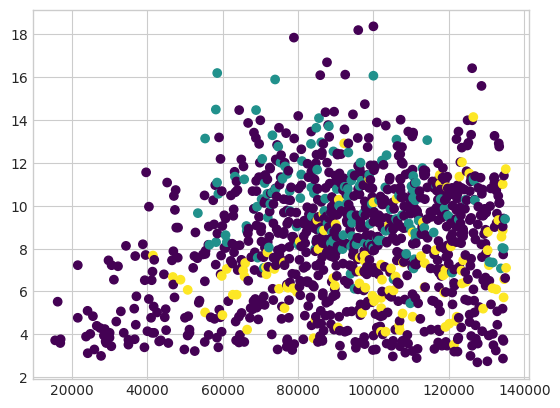

In [ ]:
labels = new_data_sub['cluster'].values
#print(labels)
plt.scatter(new_data_sub['house_avg_21'], new_data_sub['avaUnempRate'], c=labels, cmap='viridis')
new_data_sub.head(5)

In [ ]:
# filtering out for cluster 0
Golden_cluster = second_trial.query("cluster == 0")
Golden_cluster

,fips_code,Annual_Average_Weekly Wage_2012,house_avg_21,adults_bachelors_or_higher_08-12,dem_2012,Voting_Result_num,Asian and White,African American Alone,Black or African American and White,Hispanic or Latino,White Alone,avaUnempRate,cluster
0,20083,535.0,15594.05,23.1,178,1,4,4,4,190,1745,3.725,0
1,20199,542.0,16258.70,23.0,68,1,0,4,0,95,1405,5.525,0
2,20153,548.0,16953.91,21.0,184,1,0,4,4,85,2430,3.600,0
3,20025,563.0,17047.64,23.6,171,1,0,4,10,155,1980,3.775,0
4,20185,513.0,21592.56,20.8,403,1,10,25,10,530,3760,4.775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,30059,495.0,134410.45,16.5,269,1,0,0,4,15,1870,7.725,0
1096,31023,644.0,134479.64,14.1,1028,1,0,75,4,205,8030,3.700,0
1097,35003,543.0,134514.37,16.1,557,1,0,0,4,800,2735,9.400,0
1100,39015,629.0,134596.78,10.4,6923,1,15,405,270,285,43365,11.400,0


Conclusion about clustering:

We understand that from the features of unemployment rate and housing prices, we can't find good clustering or patterns for people who voted for democratic.
Note: Clustering is not the best ML for this project since our project is supervided learning project with already labeled data.

## **Conclusion and Summary:**

In this project we tried to predict political outcomes through understanding the affect of economy situation on voting.
We concluded that by the features we have, unemployment rate, housing prices, education level, didn't affect voting in remarkable ways.
we were able to, however see relationship between people's race and the party this race is tend to vote for.
We were able to create regression model and classification model that can predict voting for a certain political party through race, combined with economical metrics.